In [2]:
dat <- read.csv('femalemiceweights.csv')

In [7]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
control <- filter(dat,Diet=='chow') %>% select(Bodyweight) %>% unlist
treatment <- filter(dat,Diet=='hf') %>% select(Bodyweight) %>% unlist

In [9]:
obsdiff <- mean(treatment) - mean(control)

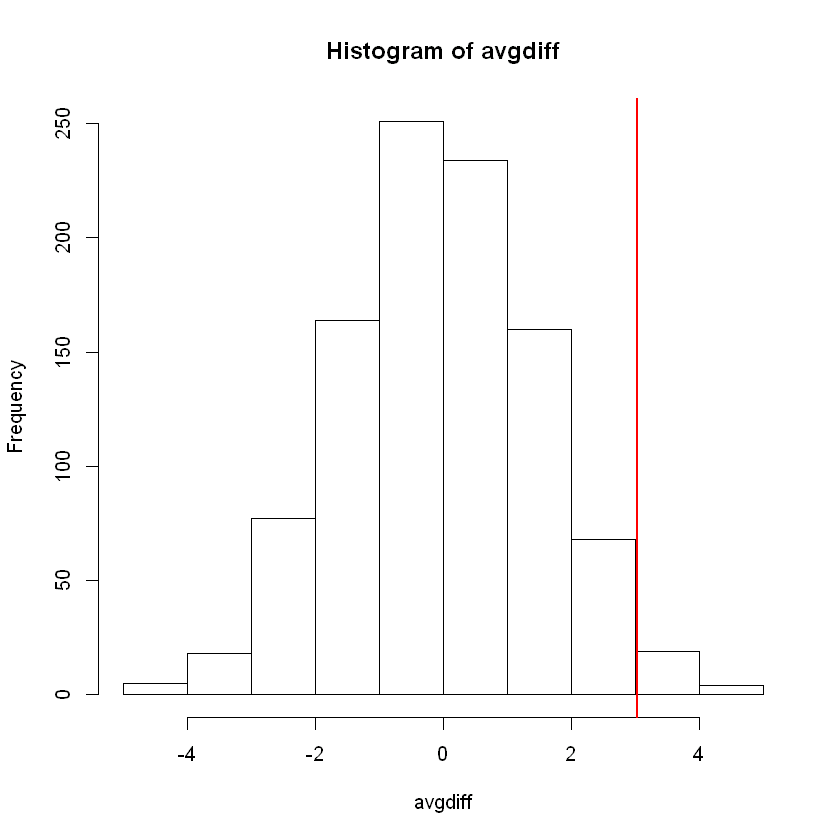

In [11]:
N <- 12
avgdiff <- replicate(1000, {
    all <- sample(c(control,treatment))
    newcontrols <- all[1:N]
    newtreatments <- all[(N+1):(2*N)]
    return(mean(newtreatments) - mean(newcontrols))
})
hist(avgdiff)
abline(v=obsdiff,col='red',lwd=2)